In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import sys
import seaborn as sns
from efficientnet_pytorch import EfficientNet

%matplotlib inline

In [474]:
ROOT_DATA = 'data'
TRAIN_IMGS = os.path.join('train','imgs')
TRAIN_CHANNELED_IMGS = os.path.join('train','imgs_channeled')
TRAIN_ANNOT = os.path.join('train','annot')
TEST_IMGS = os.path.join('test','imgs')

In [434]:
train_data_series = os.listdir(os.path.join(ROOT_DATA, TRAIN_IMGS))
test_data_series = os.listdir(os.path.join(ROOT_DATA, TEST_IMGS))

In [435]:
train_data_series_annot = os.listdir(os.path.join(ROOT_DATA, TRAIN_ANNOT))

In [462]:
n_channels = 6

In [447]:
for series in train_data_series:
    series_path = os.path.join(ROOT_DATA, TRAIN_IMGS, series)

In [467]:
lst_images = []
pathes = os.listdir(series_path)
img_name = pathes[0]
current_img = plt.imread(os.path.join(series_path, img_name))
for i in range(n_channels):
    lst_images.append(current_img)
plt.imsave()

In [449]:
for i,img_name in enumerate(tqdm()):
    current_img = plt.imread(os.path.join(series_path, img_name))
    current_img = np.expand_dims(current_img, 0)
    lst_images.append(current_img)

100%|███████████████████████████████████████████████████████████████████████████| 5448/5448 [00:00<00:00, 80331.89it/s]


In [450]:
im1.shape

(512, 640)

In [453]:
m1 = np.expand_dims(im1, 0)

In [438]:
series_path

'data\\train\\imgs\\0000000367_0000000000'

In [90]:
im1 = plt.imread(os.path.join(p, os.listdir(os.path.join(p))[1]))
im2 = plt.imread(os.path.join(p, os.listdir(os.path.join(p))[2]))

In [410]:
import cv2 as cv

In [411]:
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

In [412]:
p1 = cv.goodFeaturesToTrack(im1, mask = None, **feature_params)
p2, st, err = cv.calcOpticalFlowPyrLK(im1, im2, p1, None, **lk_params)

In [413]:
p1 = p1[st == 1]
p2 = p2[st == 1]

In [414]:
p1 = p1.reshape(len(p1),2)
p2 = p2.reshape(len(p2),2)

In [415]:
def calc_flow(prev_frame, cur_frame):
    feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

    lk_params = dict( winSize  = (15,15),
                      maxLevel = 2,
                      criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
    
    p1 = cv.goodFeaturesToTrack(im1, mask = None, **feature_params)
    p2, st, err = cv.calcOpticalFlowPyrLK(prev_frame, cur_frame, p1, None, **lk_params)
    p1 = p1[st == 1]
    p2 = p2[st == 1]
    
    shift_y, shift_x = (p2 - p1).mean(axis=0)
    shift_x = int(shift_x)
    shift_y = int(shift_y)
    return shift_y, shift_x

In [416]:
def shifting(prev_frame, y, x):
    im = np.zeros(prev_frame.shape)
#     print(y,x)
    if y>0 and x>0:
        im[y:,x:] = prev_frame[:-y,:-x]
    elif y>0 and x<0:
        im[y:,abs(x):] = prev_frame[:-y,:x]
    elif y<0 and x>0:
        im[abs(y):,:-x] = prev_frame[:y,x:]
    elif y<0 and x<0:
        im[abs(y):,abs(x):] = prev_frame[:y,:x]
        
    elif y==0 and x>0:
        im[:,:-x] = prev_frame[:,:x]
    elif y==0 and x<0:
        im[:,abs(x):] = prev_frame[:,x:]
    elif y>0 and x==0:
        im[y:,:] = prev_frame[:-y,:]
    elif y<0 and x==0:
        im[abs(y):,:] = prev_frame[:y,:]
        
    else:
        im = prev_frame
        
    return im    

In [417]:
def get_shifted(prev_frame, next_frame):
    shift_y, shift_x = calc_flow(prev_frame, next_frame)
    shifted_img = shifting(prev_frame, shift_y, shift_x)
    return shifted_img

In [418]:
im = get_shifted(im1, im2)

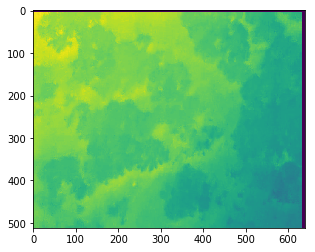

In [419]:
plt.imshow(im)

In [35]:
model = EfficientNet.from_pretrained('efficientnet-b0', num_classes=10)

Loaded pretrained weights for efficientnet-b0


In [44]:
model.cuda()

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [45]:
import torchvision
import torch

In [46]:
import cv2 as cv

In [47]:
a = torchvision.datasets.CIFAR100('./data/CIFAR100/', download=True)

Files already downloaded and verified


In [48]:
img = a.data[0]

In [49]:
img.shape

(32, 32, 3)

In [50]:
img = cv.resize(img, (64,64))

In [51]:
img = torch.FloatTensor(img)

In [52]:
img.shape

torch.Size([64, 64, 3])

In [53]:
img = torch.unsqueeze(img, 0)

In [54]:
img = img.permute(0,3,1,2)

In [55]:
img.shape

torch.Size([1, 3, 64, 64])

In [56]:
img = img/255

In [57]:
img = img.cuda()

In [58]:
p = model(img)

In [59]:
p.argmax()

tensor(8, device='cuda:0')

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class Data(Dataset):
    def __init__(imgs_path):
        self.imgs_path = 
        self.imgs_label = 
    def __len__():
        self.
        